In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

In [33]:
data_path = 'homework/data'
activities = ['idle', 'running', 'stairs', 'walking']
all_data = []

In [34]:
for activity in activities:
    files = os.listdir(os.path.join(data_path, activity))
    for file in files:
        df = pd.read_csv(os.path.join(data_path, activity, file))
        segment_length = 5
        segments = [df.iloc[i:i+segment_length] for i in range(0, len(df), segment_length)]

        time_features_list = []
        for segment in segments:
            time_diff = segment.index[-1] - segment.index[0]
            time_diff_seconds = time_diff.total_seconds() if hasattr(time_diff, 'total_seconds') else 0
            mean_values = segment.mean()
            std_values = segment.std()
            max_values = segment.max()
            min_values = segment.min()

            features = {
                'mean_accelerometer_X': mean_values['accelerometer_X'],
                'mean_accelerometer_Y': mean_values['accelerometer_Y'],
                'mean_accelerometer_Z': mean_values['accelerometer_Z'],
                'std_accelerometer_X': std_values['accelerometer_X'],
                'std_accelerometer_Y': std_values['accelerometer_Y'],
                'std_accelerometer_Z': std_values['accelerometer_Z'],
                'max_accelerometer_X': max_values['accelerometer_X'],
                'max_accelerometer_Y': max_values['accelerometer_Y'],
                'max_accelerometer_Z': max_values['accelerometer_Z'],
                'min_accelerometer_X': min_values['accelerometer_X'],
                'min_accelerometer_Y': min_values['accelerometer_Y'],
                'min_accelerometer_Z': min_values['accelerometer_Z'],
                'time_diff': time_diff_seconds,
                'activity': activity
            }
            time_features_list.append(features)

        all_data.extend(time_features_list)

In [35]:
df = pd.DataFrame(all_data)
df.to_csv('all_data.csv', index=False)

In [37]:
features = df.drop('activity', axis=1)
labels = df['activity']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=7)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# SVM модель
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [41]:
# Випадковий ліс
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [42]:
svm_report = classification_report(y_test, svm_pred, zero_division=1)
rf_report = classification_report(y_test, rf_pred, zero_division=1)
print("SVM:\n", svm_report)
print("\nRandom Forest:\n", rf_report)

SVM:
               precision    recall  f1-score   support

        idle       1.00      1.00      1.00      1240
     running       1.00      1.00      1.00      4066
      stairs       1.00      0.00      0.00       204
     walking       0.92      1.00      0.96      2245

    accuracy                           0.97      7755
   macro avg       0.98      0.75      0.74      7755
weighted avg       0.97      0.97      0.96      7755


Random Forest:
               precision    recall  f1-score   support

        idle       1.00      1.00      1.00      1240
     running       1.00      1.00      1.00      4066
      stairs       1.00      0.94      0.97       204
     walking       0.99      1.00      1.00      2245

    accuracy                           1.00      7755
   macro avg       1.00      0.98      0.99      7755
weighted avg       1.00      1.00      1.00      7755



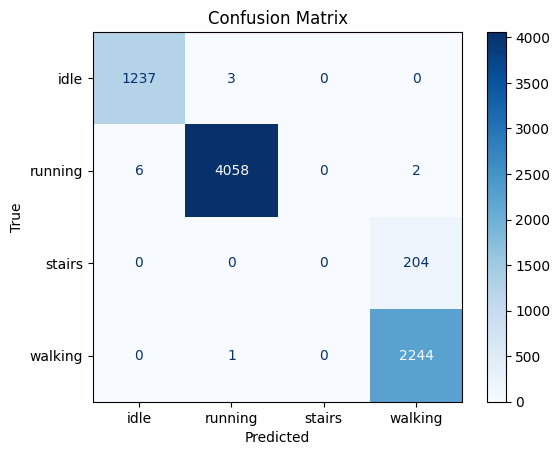

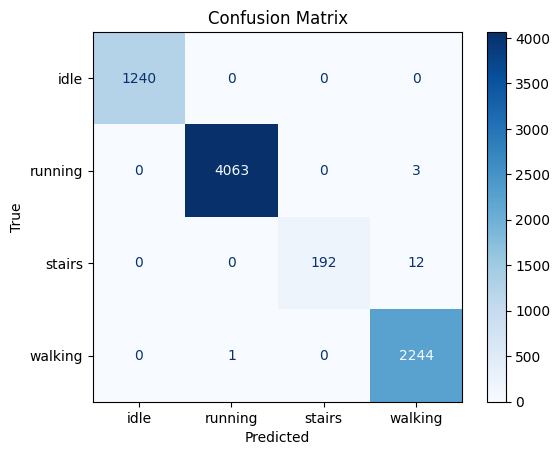

In [43]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', values_format='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, svm_pred, labels=svm.classes_)
plot_confusion_matrix(y_test, rf_pred, labels=rf.classes_)